# The Standard Normal Distribution

A continuous random variable Z is said to be standard normal (standard Gaussian). The standard normal distribution is a normal distribution of standardized values called z-scores. A z-score is measured in units of the standard error. The mean for the standard distribution is 0 and the standard deviation is 1. The transformation $z=\frac{x-\mu}{\sigma}$ produces the distribution $Z \sim N(0,1)$.  The z-score tells us how many standard deviations the value $x$ is above or below the mean.

$$f_z(z) = \frac{1}{\sqrt{2\pi}}e^-\frac{z^2}{2} \ for \ all\ z \in \mathbb{R}$$  

The Cumulative Distribution Function (CDF) of the standard normal distribution is found by integrating the standard normal probability density function.

$$F_z(z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z}e^-\frac{u^2}{2}du = \Phi(x) = P(Z \leq x) $$

The CDF of the standard normal distribution is commonly written as $\Phi$. Some important property of $\Phi$
- $\lim_{x\to\infty}\Phi(x) =1 ,\ \lim_{x\to-\infty}\Phi(x) =0$
- $\Phi(0) = \frac{1}{2}$
- $\Phi(-x)=1 - \Phi(x) ,\ for\ all\ x \in \mathbb{R}$ 

Informally, if we realize that probability for a continuous random variable is given by areas under pdf's, then, since there is no area in a line, there is no probability assigned to a random variable taking on a single value. This does not mean that a continuous random variable will never equal a single value, only that we do not assign any probability to single values for the random variable. For this reason, we only talk about the probability of a continuous random variable taking a value in an interval, not at a point. <b>The CDF and the PDF are similar, except the CDF gives the accumulated probability up to x.</b>

$$F_z(z) = P(Z\leq \ x) = \int_{-\infty}^{x}f(u)du$$ 

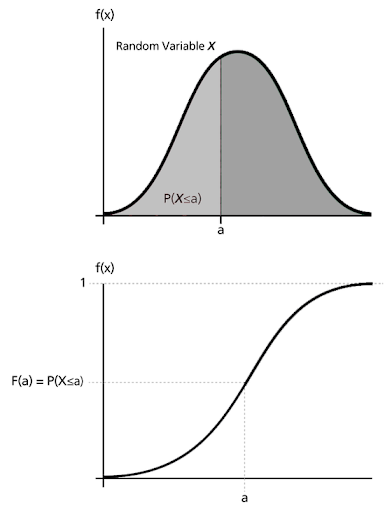

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats, scipy as stats
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
#a one demensional vector of 10000 normal values with mean = 0 and stdev=3 stating the mu and stdev is import for this excersie 
#because we'll use the variables for transformation purposes later
mu,var = 40,10

#create non-standardized, but normal array of 10000 values
x = random.normal(loc=mu, scale=var, size=10000)

<AxesSubplot:ylabel='Density'>

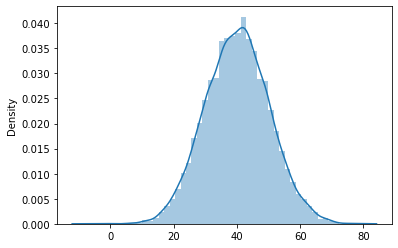

In [3]:
#plot the values
sns.distplot(x)

<AxesSubplot:ylabel='Density'>

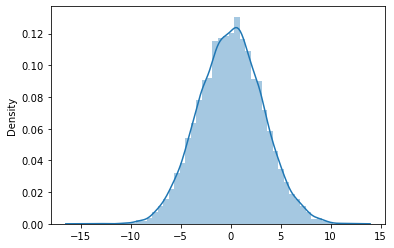

In [4]:
#convert to standard normal using a lambda function for each row of array
zscore = lambda x: (x-mu)/np.sqrt(var)

#instantiate a vectorize transformer
vectorize = np.vectorize(zscore)

#apply the lambda to the array
normal = vectorize(x)

#plot the data
sns.distplot(normal)

[(-4.0, 4.0)]

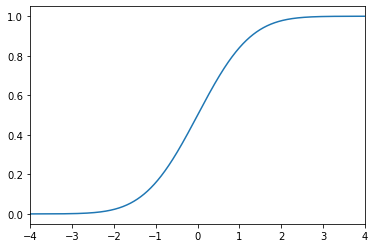

In [5]:
#create a cdf of the norm. Loc and scale params were not added because the dist was standardized
normcdf = norm.cdf(normal)

#plot the cdf against the normals.
sns.lineplot(normal,normcdf).set(xlim= (-4,4))

In [6]:
# the area under the curve from 0 to -1
# Or the probability that randomly select x falls between 0 and -1
norm.cdf(0)-norm.cdf(-1)

0.3413447460685429

We must normalize non-standardized distributions and then calculate the area under the curve. There are tables of z-scores used to find the probabilities given values because the cdf function is difficult to derive. The following is an example of python implmentation.

$Let \ X\sim N(-5,4)$. $Find \ P(X<0)$

$$P(X<0) \ = \  F_{x}(x) \ = \  \Phi \left( \frac{(x-\mu)}{\sigma} \right)$$

$$ = \Phi \left( \frac{(0-(-5))}{\sqrt{4}} \right)$$

$$ = \Phi(2.5) \approx 0.99$$

In [7]:
mu,var = -5,4
zscore = (0-mu)/np.sqrt(4)
norm.cdf(zscore)

0.9937903346742238

$Let \ X\sim N(-5,4)$. $Find \ P(-7 < X < -3)$

$$P(-7 < X < -3) \ = \  F_{x}(x) \ = \  \Phi \left( \frac{(b-\mu)}{\sigma} \right) -  \Phi \left( \frac{(a-\mu)}{\sigma} \right)$$

$$ = \Phi \left( \frac{(-3-(-5))}{\sqrt{4}} \right) - \Phi \left( \frac{(-7-(-5))}{\sqrt{4}} \right)$$

$$ = \Phi(1) - \Phi(-1) \approx 0.68$$

In [8]:
#create the zscores smallest to largest 
zscore_a = (-7 - (-5))/np.sqrt(var)
zscore_b = (-3 - (-5))/np.sqrt(var)

#subtract the zscores largest from smallest
norm.cdf(zscore_b) - norm.cdf(zscore_a)

0.6826894921370859